In [1]:
# Load required modules

import numpy as np
import pandas
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

import scipy.signal

%matplotlib inline

In [2]:
# Class to easily load and plot APOGEE spectra

class APOGEESpec:
    def __init__(self, url):
        hdul = fits.open(url)

        self.flux_decomp = np.array(hdul[1].data)
        self.flux_err_decomp = np.array(hdul[2].data)

        self.flux = np.average(self.flux_decomp, axis=0, weights=self.flux_err_decomp**-2)
        self.flux_err = 1/np.sqrt(np.sum(self.flux_err_decomp**-2, axis=0))
        norm = np.nanmedian(self.flux)
        self.flux /= norm
        self.flux_err /= norm
        
        self.sky = hdul[5].data
        self.sky_err = hdul[6].data
        
        self.wave = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(hdul[1].data.shape[1])))

    def plot(self, d=-1, ax=plt, errors=False, err_mul=1, **kwargs):
        if d==-1:
            f = self.flux
            err = self.flux_err
        else:
            f = self.flux_decomp[d]
            err = self.flux_err_decomp[d]
            
        if errors:
            ax.fill_between(self.wave, f - err*err_mul, f + err*err_mul, **kwargs)
        else:
            ax.plot(self.wave, f, **kwargs)

In [3]:
# Open all spectra into APOGEESPec objects

with open('../data/sample_star_urls', 'r') as f:
    urls = f.read().splitlines()

spectra = [ APOGEESpec('../data/spectra/%s' %url.split('/')[-1]) for url in urls ]

/tmp/ipykernel_605803/4275754558.py:10: RuntimeWarning: divide by zero encountered in power
  self.flux = np.average(self.flux_decomp, axis=0, weights=self.flux_err_decomp**-2)
/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/tmp/ipykernel_605803/4275754558.py:11: RuntimeWarning: divide by zero encountered in power
  self.flux_err = 1/np.sqrt(np.sum(self.flux_err_decomp**-2, axis=0))
/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [4]:
# Load solar reference from vesta spectrum

vesta = APOGEESpec('../data/apStar-dr17-VESTA.fits')

/tmp/ipykernel_605803/4275754558.py:10: RuntimeWarning: divide by zero encountered in power
  self.flux = np.average(self.flux_decomp, axis=0, weights=self.flux_err_decomp**-2)
/tmp/ipykernel_605803/4275754558.py:11: RuntimeWarning: divide by zero encountered in power
  self.flux_err = 1/np.sqrt(np.sum(self.flux_err_decomp**-2, axis=0))


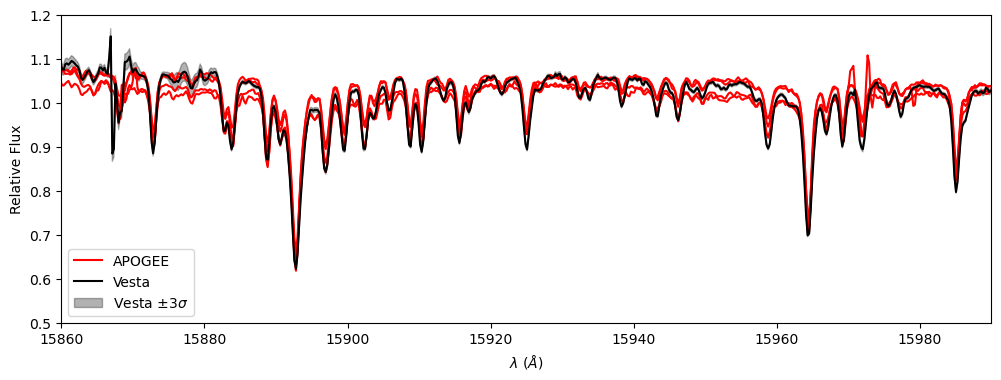

In [5]:
# Plot Vesta against a few APOGEE spectra

plt.figure(figsize=(12,4))

spectra[1].plot(color='red', label='APOGEE')
for i in range(2,5):
    spectra[i].plot(color='red')

vesta.plot(color='black', label='Vesta')
vesta.plot(color='black', errors=True, err_mul=3, alpha=0.3, label='Vesta $\pm 3\sigma$')

plt.xlim(15860,15990)
plt.ylim(0.5, 1.2)

plt.xlabel(r'$\lambda$ ($\AA$)')
plt.ylabel(r'Relative Flux')

_ = plt.legend()

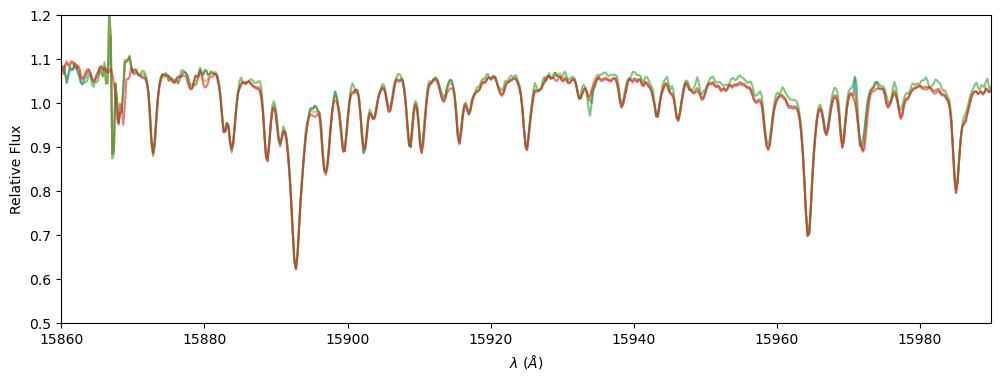

In [6]:
# Plot all exposures of vesta

plt.figure(figsize=(12,4))

for i in range(len(vesta.flux_decomp)):
    plt.plot(vesta.wave, vesta.flux_decomp[i], alpha=0.6)
    
plt.xlim(15860,15990)
plt.ylim(0.5, 1.2)

plt.xlabel(r'$\lambda$ ($\AA$)')
_ = plt.ylabel(r'Relative Flux')

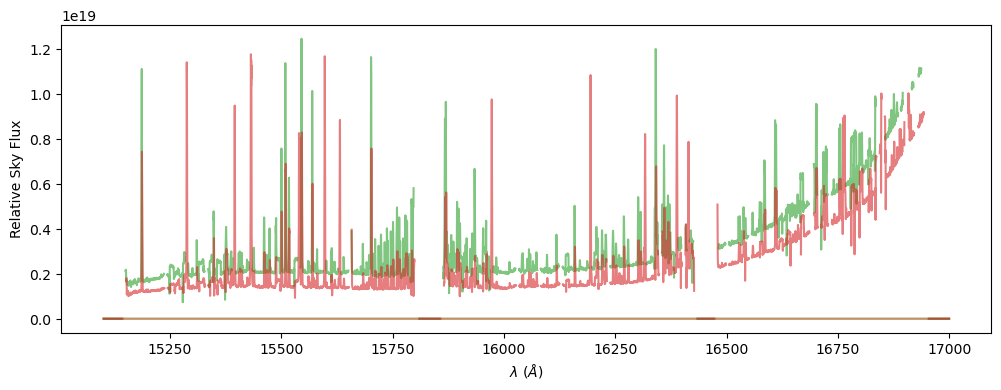

In [7]:
# Plot estimated sky flux for vesta spectrum (for all exposures)

plt.figure(figsize=(12,4))

for i in range(0, len(vesta.sky)):
    plt.plot(vesta.wave, vesta.sky[i], alpha=0.6)
    
plt.xlabel(r'$\lambda$ ($\AA$)')
_ = plt.ylabel(r'Relative Sky Flux')